<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funciones-a-utilizar:" data-toc-modified-id="Funciones-a-utilizar:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funciones a utilizar:</a></span></li><li><span><a href="#Generación-de-los-datos" data-toc-modified-id="Generación-de-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generación de los datos</a></span></li></ul></div>

# Práctica 7: HMM

In [24]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (8.0, 4.0)
from time import sleep
from scipy.linalg import sqrtm
from matplotlib import colors as mcolors
from matplotlib.patches import Ellipse

#from habla_utils.signal import *
#from habla_utils.statistics import *
#from itertools import permutations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Funciones a utilizar:

In [21]:
# Specification of some HMMs for classification

class hmm:
    
    def __init__(self,means,vrs,trans):
        self.means = means
        self.vrs = vrs
        self.trans = trans
        
        self.dim = means.shape[1]
        self.numStates = means.shape[0] + 2
        self.devs = np.array([sqrtm(M) for M in vrs])
     
    
def genhmm(hmm):

    stateSeq = [0]
    while stateSeq[-1] != hmm.numStates-1:
        stateSeq.append(int(np.random.choice(hmm.numStates, 1, p=trans[stateSeq[-1],:])))

    stateSeq = np.array(stateSeq)
    x = np.add.reduce(np.matmul(np.random.randn(stateSeq.size-2, hmm.dim)[:,np.newaxis,:],hmm.devs[(stateSeq[1:-1]-1)]),axis=1)
    
    return stateSeq, x


def plotseq(hmm, stateSeq, x):
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    classes_names = np.array(['Fonema '+str(i+1) for i in range(hmm.numStates-2)],dtype=object)
    colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).values())

    ax1.plot(x[:,0])
    ax2.plot(x[:,1])

    s = stateSeq[1:-1]-1
    for i in range(hmm.numStates-2):
        mask = s==i
        ax1.scatter(np.arange(s.size)[mask],x[mask,0],color=colors[i],label=classes_names[i])
        ax2.scatter(np.arange(s.size)[mask],x[mask,1],color=colors[i],label=classes_names[i])

    ax1.legend()
    
    return ax1, ax2
    
    
def plotseq2(hmm,stateSeq,x,gauss=False):
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    classes_names = np.array(['Fonema '+str(i+1) for i in range(hmm.numStates-2)],dtype=object)
    colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).values())

    ax.plot(x[:,0],x[:,1])
    
    for i in range(x.shape[0]):
        ax.annotate(str(i+1),(x[i,0],x[i,1]))
    

    s = stateSeq[1:-1]-1
    for i in range(hmm.numStates-2):
        mask = s==i
        ax.scatter(x[mask,0],x[mask,1],color=colors[i],label=classes_names[i])
        if gauss:
            mean = x[mask,:].mean(axis=0)
            cov = np.cov(x[mask,:].T)
            covariance_ellipse(mean,cov,ax=ax,color=colors[i])
        
    ax.legend()
    
    return ax
    
    
def covariance_ellipse(mu, sigma, ax=None, color="k"):
    
    # Cálculo de los autovalores:
    vals, vecs = np.linalg.eigh(sigma)
    
    # Inclinación de la elipse:
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Semiejes de la elipse:
    w, h = 2 * np.sqrt(vals)

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
                
    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color)
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    
    return ax

## Generación de los datos

In [16]:
from scipy.io import loadmat
x = loadmat('./archivos_p7/data.mat')
X1, X2, X3, X4, X5, X6 = x['X1'], x['X2'], x['X3'], x['X4'], x['X5'], x['X6']
ST1, ST2, ST3, ST4, ST5, ST6 = x['ST1'].astype(np.int)[0]-1, x['ST2'].astype(np.int)[0]-1, x['ST3'].astype(np.int)[0]-1, x['ST4'].astype(np.int)[0]-1, x['ST5'].astype(np.int)[0]-1, x['ST6'].astype(np.int)[0]-1

In [4]:
# GENDATA Generation of simulation data for HMM lab

# Specification of simulated vowels statistics
Pa = 0.25
mu_a = np.array([730., 1090.])
std_a = np.array([[35.,  20.],
                  [20.,  230.]])
var_a = std_a.dot(std_a)

Pe = 0.3
mu_e = np.array([530., 1840.])
std_e = np.array([[120.,  25.],
                  [25.,  190.]])
var_e = std_e.dot(std_e)

Pi = 0.25
mu_i = np.array([270., 2290.])
std_i = np.array([[50.,  5.],
                  [5.,  190.]])
var_i = std_i.dot(std_i)

Po = 0.15
mu_o = np.array([570., 840.])
std_o = np.array([[40.,  20.],
                  [20.,  140.]])
var_o = std_o.dot(std_o)

Py = 0.05
mu_y = np.array([440., 1020.])
std_y = np.array([[80.,  40.],
                  [40.,  130.]])
var_y = std_y.dot(std_y)

        
# 1: ergodic /aiy/, "unstable"
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.4, 0.3, 0.3, 0.0],
                  [0.0, 0.3, 0.4, 0.3, 0.0],
                  [0.0, 0.3, 0.3, 0.3, 0.1],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm1 = hmm(means, vrs, trans)

# 2: ergodic /aiy/, "stable"
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.025, 0.025, 0.0],
                  [0.0, 0.025, 0.95, 0.025, 0.0],
                  [0.0, 0.02, 0.02, 0.95, 0.01],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm2 = hmm(means, vrs, trans)

# 3: left-right /aiy/, unstable
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.5, 0.5, 0.0, 0.0],
                  [0.0, 0.0, 0.5, 0.5, 0.0],
                  [0.0, 0.0, 0.0, 0.5, 0.5],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm3 = hmm(means, vrs, trans)

# 4: left-right /aiy/, stable
means = np.stack((mu_a,mu_i,mu_y))
vrs = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.05, 0.0, 0.0],
                  [0.0, 0.0, 0.95, 0.05, 0.0],
                  [0.0, 0.0, 0.0, 0.95, 0.05],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm4 = hmm(means, vrs, trans)

# 5: left-right /yia/, stable
means = np.stack((mu_y,mu_i,mu_a))
vrs  = np.stack((var_y,var_i,var_a))
trans = np.array([[0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.95, 0.05, 0.0, 0.0],
                  [0.0, 0.0, 0.95, 0.05, 0.0],
                  [0.0, 0.0, 0.0, 0.95, 0.05],
                  [0.0, 0.0, 0.0, 0.0, 1.0]])

hmm5 = hmm(means, vrs, trans)

# 6: left-right /aie/, stable
means = np.stack((mu_a,mu_i,mu_e))
vrs  = np.stack((var_a,var_i,var_e))
trans = np.array([[0.0, 1.0,  0.0,  0.0,  0.0],
                  [0.0, 0.95, 0.05, 0.0,  0.0],
                  [0.0, 0.0,  0.95, 0.05, 0.0],
                  [0.0, 0.0,  0.0,  0.95, 0.05],
                  [0.0, 0.0,  0.0,  0.0,  1.0]]);

hmm6 = hmm(means, vrs, trans)

# 7: left-right /aiy/, stable w/ unequal stay probas
means = np.stack((mu_a,mu_i,mu_y))
vrs  = np.stack((var_a,var_i,var_y))
trans = np.array([[0.0, 1.0,  0.0,  0.0,  0.0],
                  [0.0, 0.7,  0.3,  0.0,  0.0],
                  [0.0, 0.0,  0.95, 0.05, 0.0],
                  [0.0, 0.0,  0.0,  0.7,  0.3],
                  [0.0, 0.0,  0.0,  0.0,  1.0]])

hmm7 = hmm(means, vrs, trans)


<IPython.core.display.Javascript object>


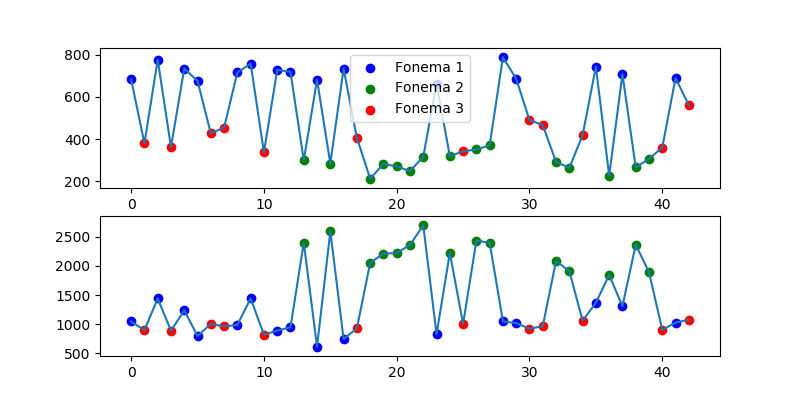

<IPython.core.display.Javascript object>


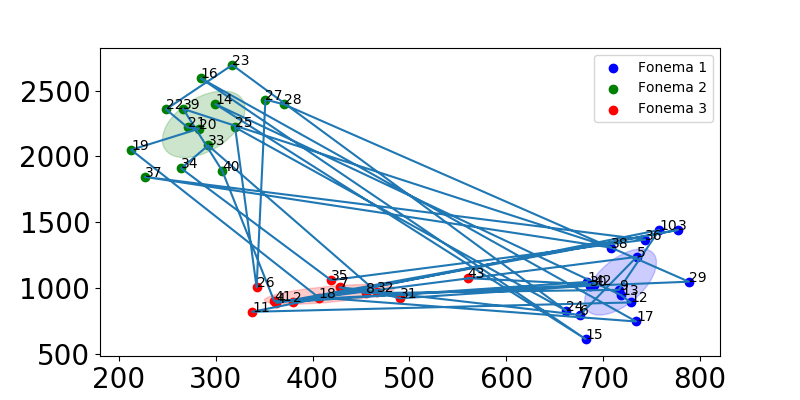

In [25]:
ax1, ax2 = plotseq(hmm1,ST1,X1)
ax = plotseq2(hmm1,ST1,X1,gauss=True)
# ax1, ax2 = plotseq(hmm1,ST2,X2)
# ax1, ax2 = plotseq(hmm1,ST3,X3)
# ax1, ax2 = plotseq(hmm1,ST4,X4)
# ax1, ax2 = plotseq(hmm1,ST5,X5)
# ax1, ax2 = plotseq(hmm1,ST6,X6)

<IPython.core.display.Javascript object>


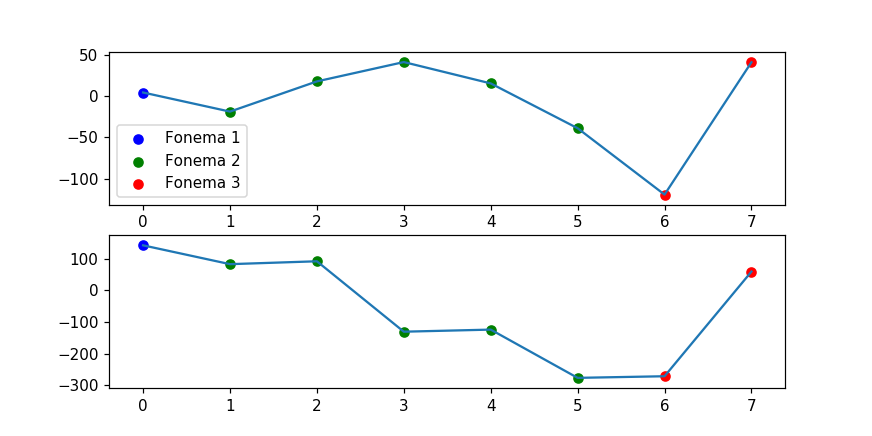

<IPython.core.display.Javascript object>


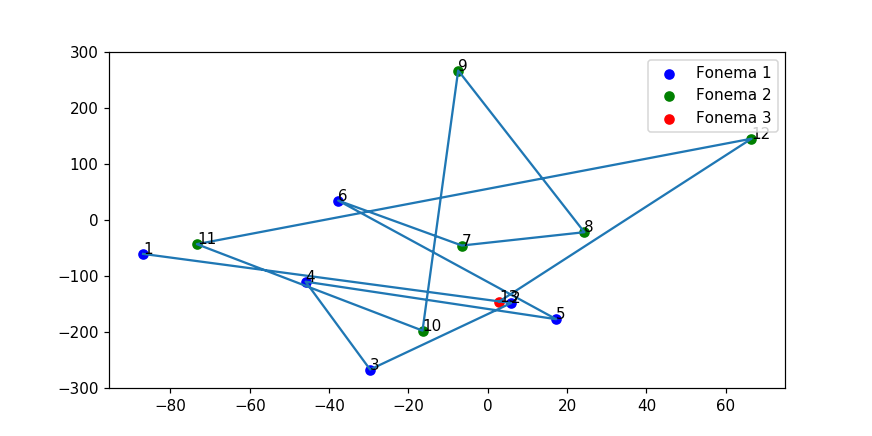

In [47]:
stateSeq, x = genhmm(hmm2)
ax1, ax2 = plotseq(hmm2,stateSeq,x)
ax = plotseq2(hmm2,stateSeq,x)
covariance_ellipse(mu, sigma, ax=None, color="k"):